# Data Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', sep=',')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [43]:
data.shape

(7043, 22)

In [3]:
data_churn = data[data['Churn'] == 'Yes']

In [44]:
data_churn.shape

(1869, 22)

In [4]:
# replicating the rows where churn = yes to get more balanced data
data_yes_duplicated = pd.concat([data, data_churn])
data_yes_duplicated.shape

(8912, 21)

In [0]:
col_list = data.columns
print(col_list)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


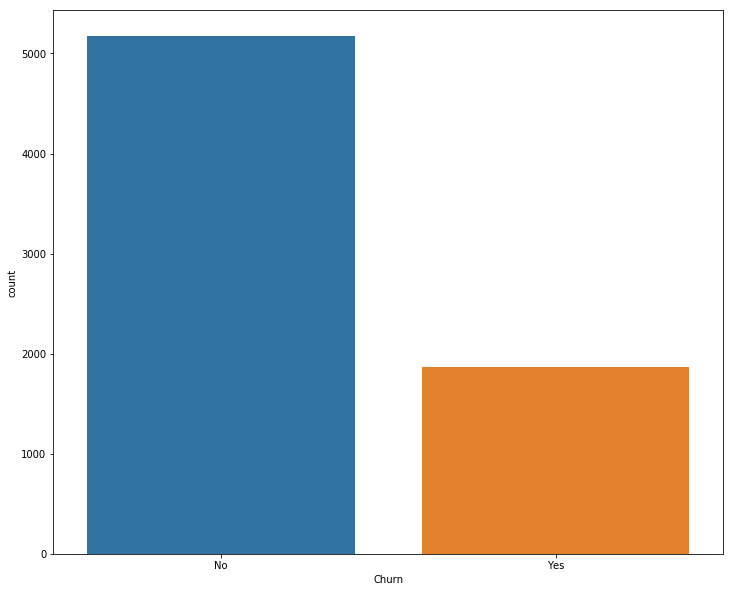

In [0]:
# verificando o balnceamento da base em relação à variável alvo

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(12,10))
sns.countplot(x='Churn', data=data, order=data['Churn'].value_counts().index)

Não existe um desbalanceamento substancial na variável alvo

In [0]:
data.shape

(7043, 21)

In [0]:
# gerando um arquivo html contendo um relatório sobre a base para ter uma visão geral dos dados

import pandas_profiling

profile = data.profile_report(title='Telco Customers data Profiling Report')
profile.to_file(output_file="telco_data_report.html")

O relatório mostra que nenhuma das colunas possuem missing values, exigindo menos tratamento

# Avaliando as variáveis numéricas

In [0]:
# visualizando estatísticas das colunas numéricas
data['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [0]:
# visualizando estatísticas das colunas numéricas
data['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [0]:
lista = data['TotalCharges'].unique()
print(lista[480:490])

['680.05' '6130.85' '1415' '6201.95' ' ' '74.35' '6597.25' '114.15'
 '139.4' '3902.6']


In [5]:
def cleaner(charges):
    
    if charges == ' ':
        
        charges = '0'
        
    else:
        
        charges = charges
        
    return charges

In [6]:
data_yes_duplicated['TotalCharges'] = data_yes_duplicated['TotalCharges'].apply(cleaner)

In [5]:
data[data['TotalCharges'] == '0'].head(15)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [7]:
def floaterization(cat):
    
    cat = float(cat)
    
    return cat

In [8]:
data_yes_duplicated['TotalCharges'] = data_yes_duplicated['TotalCharges'].apply(floaterization)

In [0]:
data['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

In [0]:
# analisando os churns por média de tempo que o cliente está com a empresa

tenure_churn = pd.DataFrame(data.groupby('Churn')['tenure'].mean().rename('tenure_mean'))
tenure_churn.head()

# sns.catplot(x="EmpSatisfaction",y="count_terminations",kind='bar',hue='Termd',data=sats_terminations)

,tenure_mean
Churn,
No,37.650010
Yes,17.979133


In [0]:
# analisando os churns por média de TotalCharges

tc_churn = pd.DataFrame(data.groupby('Churn')['TotalCharges'].mean().rename('TotalCharges_mean'))
tc_churn.head()

,TotalCharges_mean
Churn,
No,2555.344141
Yes,1531.796094


In [0]:
# analisando os churns por média de MonthlyCharges

mc_churn = pd.DataFrame(data.groupby('Churn')['MonthlyCharges'].mean().rename('MonthlyCharges_mean'))
mc_churn.head()

,MonthlyCharges_mean
Churn,
No,61.307408
Yes,74.441332


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

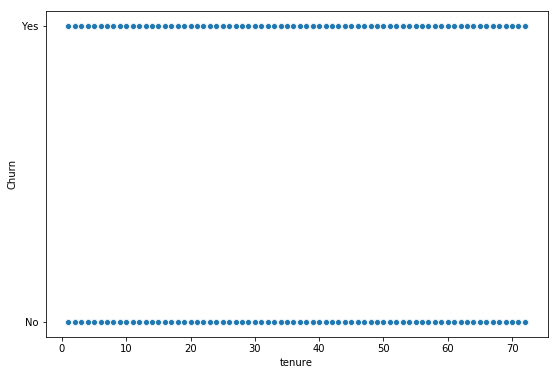

In [0]:
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(ax=ax, x='tenure',y='Churn',data=data)

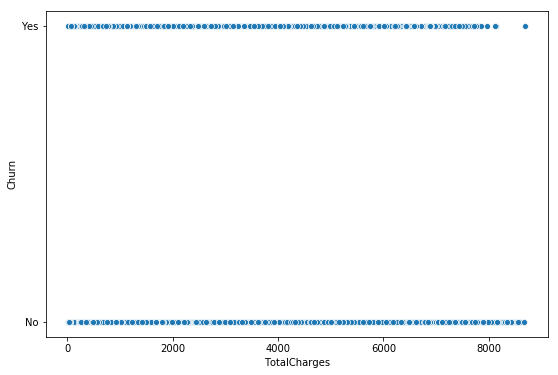

In [0]:
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(ax=ax, x='TotalCharges',y='Churn',data=data)

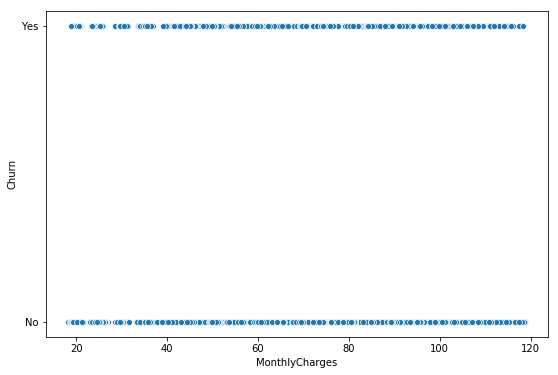

In [0]:
a4_dims = (9, 6)
fig, ax = plt.subplots(figsize=a4_dims)

sns.scatterplot(ax=ax, x='MonthlyCharges',y='Churn',data=data)

In [0]:
data['TotalCharges'].corr(data['tenure'])

0.8258804609332018

# Avaliando as variáveis categóricas

Ganho de Informação

In [0]:
# calculando oganho de informação de cada um dos atributos em relação à variável alvo (Churn)

# entropia na base:

import math

n = len(data['Churn'])
n0 = len(data[data['Churn'] == 'No'])
n1 = len(data[data['Churn'] == 'Yes'])

p0 = n0/n
p1 = n1/n

s = -(p0*math.log(p0, 2) + p1*math.log(p1, 2))

print(s)

0.835351115333023


In [0]:
colunas = data.columns
print(colunas)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [0]:
# calculando o GI de alguns atributos categóricos

colunas = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']


GI = 0
GI_result = []
for col in colunas:
    df_inter = data
    row_values = df_inter[col].unique()
    
    son_entropy = 0
    for unique in row_values:
        
        df = df_inter[df_inter[col]==unique]
        
        x = len(df)
        
        px = x/n
        
        l0 = len(df[df['Churn']=='No'])
        l1 = len(df[df['Churn']=='Yes'])
        
        c0 = l0/x
        c1 = l1/x
        
        if c0 == 1:
            
            c0 = 0.99999
            c1 = 0.00001
            
        if c0 == 0:
            
            c0 = 0.00001
            c1 = 0.99999
        
        son_entropy = son_entropy + (-(px*(c0*math.log(c0, 2) + c1*math.log(c1, 2))))
        
    GI = s - son_entropy
    
    #print('entropy by ', col, ' is ', son_entropy)
    print('GI by ', col, ' is ', GI)

GI by  gender  is  5.266462744468736e-05
GI by  SeniorCitizen  is  0.015195365435384356
GI by  Partner  is  0.016422410868688675
GI by  Dependents  is  0.02058772856974811
GI by  PhoneService  is  9.975388225258452e-05
GI by  MultipleLines  is  0.0011517851035277582
GI by  InternetService  is  0.07991620703249047
GI by  OnlineSecurity  is  0.09309457404253474
GI by  OnlineBackup  is  0.06731469992811256
GI by  DeviceProtection  is  0.06316737267071704
GI by  TechSupport  is  0.09070627318832458
GI by  StreamingTV  is  0.04588136206030691
GI by  StreamingMovies  is  0.04604847552952951
GI by  Contract  is  0.14164697191442988
GI by  PaperlessBilling  is  0.02758326913921716
GI by  PaymentMethod  is  0.06408873356857725


In [0]:
# Analyzing the relationship between the services and the target
# what happens if the customer has all the services?

services = data[data ['PhoneService'] == 'Yes']
services = services[services ['MultipleLines'] == 'Yes']
services = services[services ['InternetService'] != 'No']
services = services[services ['OnlineSecurity'] == 'Yes']
services = services[services ['OnlineBackup'] == 'Yes']
services = services[services ['DeviceProtection'] == 'Yes']
services = services[services ['TechSupport'] == 'Yes']
services = services[services ['StreamingTV'] == 'Yes']
services = services[services ['StreamingMovies'] == 'Yes']

In [0]:
services.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
28,5248-YGIJN,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),90.25,6369.45,No
140,3146-MSEGF,Female,1,Yes,Yes,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),88.05,6425.65,No
167,5997-OPVFA,Male,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),89.05,6254.45,No
256,7017-VFHAY,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),115.10,7008.15,No


In [0]:
services.shape

(208, 21)

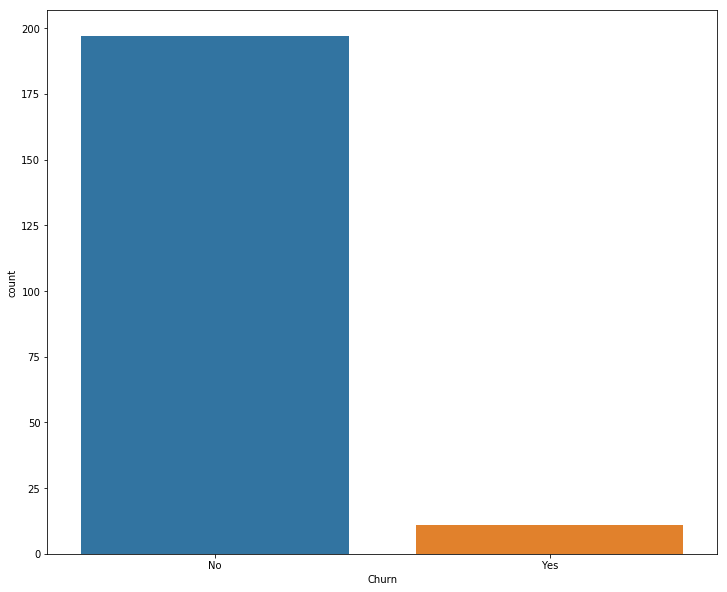

In [0]:
plt.figure(figsize=(12,10))
sns.countplot(x='Churn', data=services, order=services['Churn'].value_counts().index)

Insight do gráfico acima: se o cliente possui todos os serviços, a probabilidade de churn é muito pequena

In [0]:
def category(tenure):
    
    if 0 <= tenure <= 15:
        return '0-15'
    if 15 < tenure <= 30:
        return '16-30'
    if 30 < tenure <= 45:
        return '31-45'
    if 45 < tenure <= 60:
        return '46-60'
    if tenure > 60:
        return 'acima de 60'

In [0]:
data['tenure_bin'] = data['tenure'].apply(category)
data['tenure_bin'].head()

0     0-15
1    31-45
2     0-15
3    31-45
4     0-15
Name: tenure_bin, dtype: object

<Figure size 864x720 with 0 Axes>

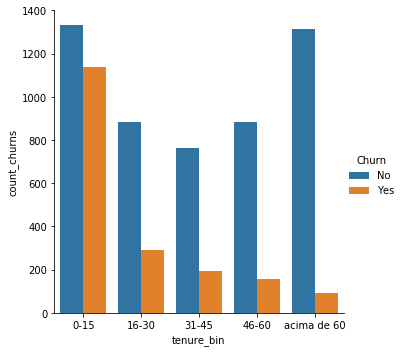

In [0]:
tenure_churn = pd.DataFrame(data.groupby(['tenure_bin', 'Churn'])['Churn'].count().rename('count_churns'))
tenure_churn.reset_index(inplace=True)

plt.figure(figsize=(12,10))
sns.catplot(x="tenure_bin", y='count_churns', kind='bar', hue='Churn', data=tenure_churn)

O gráfico acima mostra que quanto mais tempo com a empresa o cliente tem, menor é a probabilidade de churn.
A grande maioria dos casos de churn estão entre os clientes com menos de 15 meses com a empresa

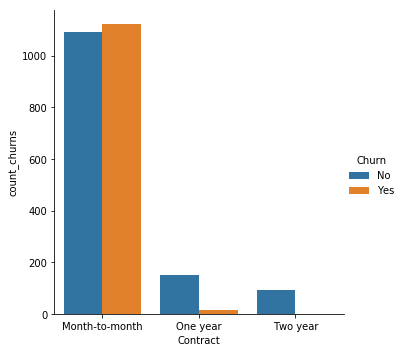

In [0]:
tenure_contract = data[data['tenure_bin'] == '0-15']

tenure_contract = pd.DataFrame(tenure_contract.groupby(['Contract', 'Churn'])['Churn'].count().rename('count_churns'))
tenure_contract.reset_index(inplace=True)

sns.catplot(x="Contract", y='count_churns', kind='bar', hue='Churn', data=tenure_contract)

Para os indivíduos que são clientes há menos de 15 meses, a grande maioria dos casos de churn ocorrem para aqueles que usam contrato month-to-month

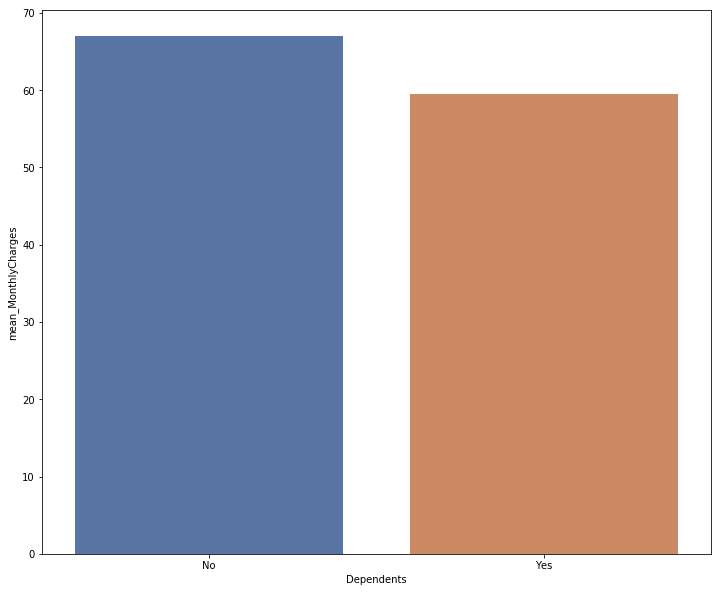

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

dep = pd.DataFrame(data.groupby(['Dependents'])['MonthlyCharges'].mean().rename('mean_MonthlyCharges'))
dep.reset_index(inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x=dep['Dependents'], y=dep['mean_MonthlyCharges'], palette="deep")

Em média, as pessoas que possuem dependentes gastam menos mensalmente

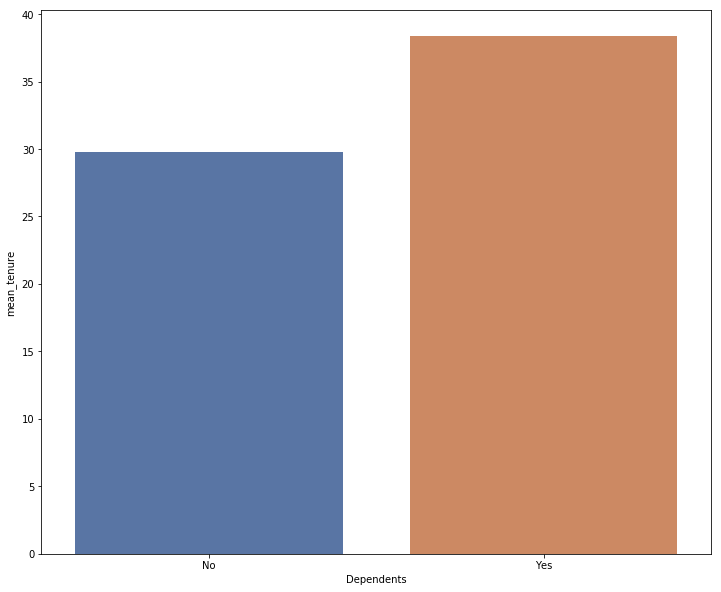

In [0]:
dep = pd.DataFrame(data.groupby(['Dependents'])['tenure'].mean().rename('mean_tenure'))
dep.reset_index(inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x=dep['Dependents'], y=dep['mean_tenure'], palette="deep")

As pessoas que possuem dependentes passam, em média, mais tempo com a empresa

# Analisando padrões entre os clientes que deram churn

In [0]:
positives = data[data['Churn'] == 'Yes']

In [0]:
positives.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes


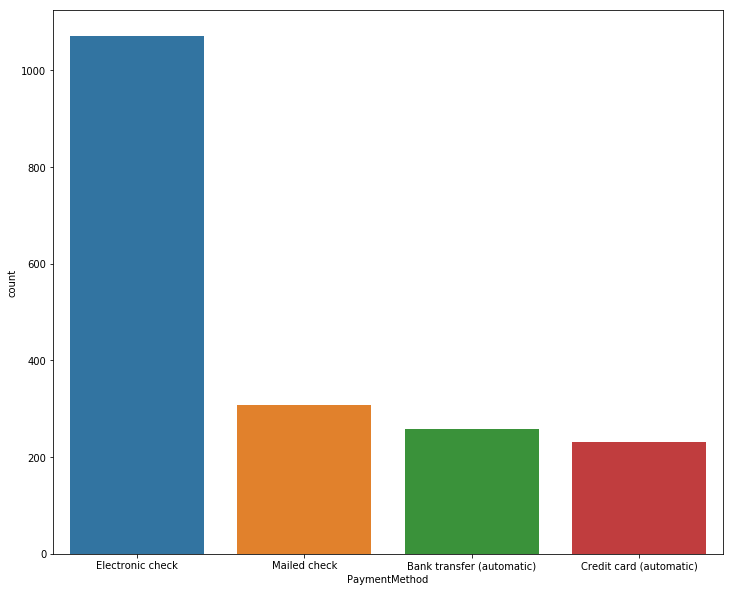

In [0]:
plt.figure(figsize=(12,10))
sns.countplot(x='PaymentMethod', data=positives, order=positives['PaymentMethod'].value_counts().index)

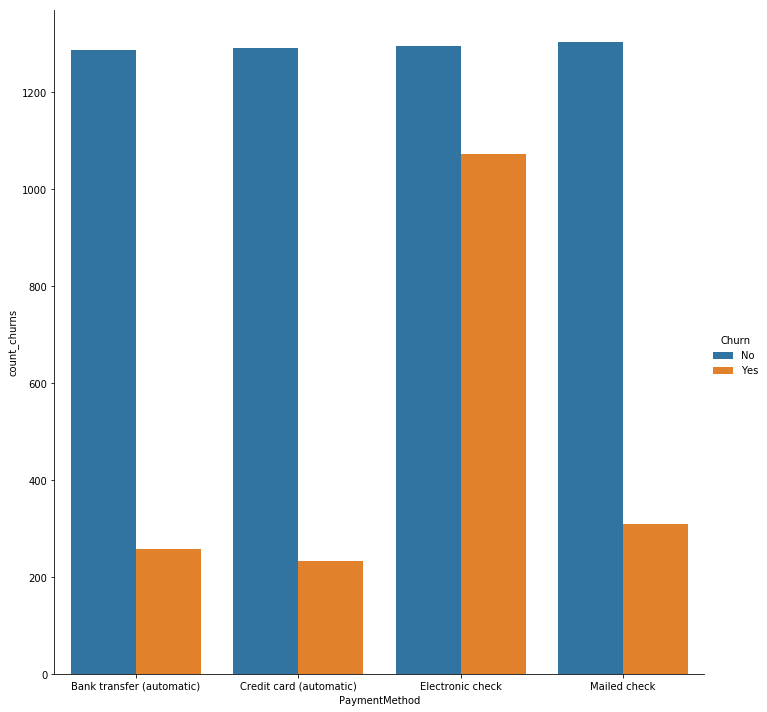

In [0]:
payment_churn = pd.DataFrame(data.groupby(['PaymentMethod', 'Churn'])['Churn'].count().rename('count_churns'))
payment_churn.reset_index(inplace=True)

sns.catplot(x="PaymentMethod", y='count_churns', kind='bar', hue='Churn', data=payment_churn, height=10)

In [9]:
# Analyzing the relationship between the services and the target
# what the number of services can show to us?

def count_services(s1, s2, s3, s4, s5, s6, s7, s8, s9):
    a = 0
    
    if s1 == 'Yes':
        a = a + 1

    if s2 == 'Yes':
        a = a + 1
        
    if s3 != 'No':
        a = a + 1
        
    if s4 == 'Yes':
        a = a + 1
        
    if s5 == 'Yes':
        a = a + 1
        
    if s6 == 'Yes':
        a = a + 1
        
    if s7 == 'Yes':
        a = a + 1
        
    if s8 == 'Yes':
        a = a + 1
        
    if s9 == 'Yes':
        a = a + 1
        
    return a

In [10]:
data_yes_duplicated['number_of_services'] = data_yes_duplicated.apply(lambda x: count_services(x['PhoneService'], x['MultipleLines'], x['InternetService'], x['OnlineSecurity'], x['OnlineBackup'], x['DeviceProtection'], x['TechSupport'], x['StreamingTV'], x['StreamingMovies']), axis=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


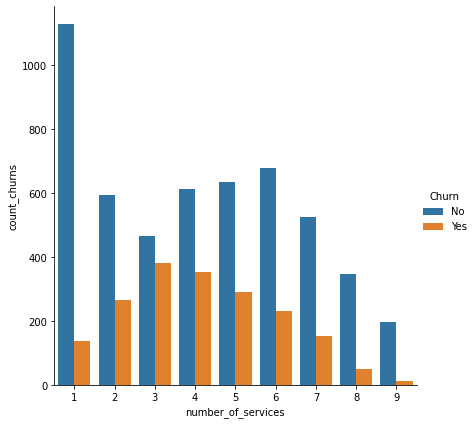

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

services = pd.DataFrame(data.groupby(['number_of_services', 'Churn'])['Churn'].count().rename('count_churns'))
services.reset_index(inplace=True)

sns.catplot(x="number_of_services", y='count_churns', kind='bar', hue='Churn', data=services, height=6)

# Data Preparation with sklearn


In [16]:
colunas = data_yes_duplicated.columns
print(colunas)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'number_of_services'],
      dtype='object')


In [11]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [12]:
y = data_yes_duplicated['Churn']
x = data_yes_duplicated[['InternetService', 'Contract', 'PaperlessBilling', 
          'PaymentMethod', 'TotalCharges', 'number_of_services']]

In [13]:
from sklearn.compose import make_column_transformer

In [14]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['InternetService', 'Contract', 'PaperlessBilling', 
          'PaymentMethod']), 
    remainder='passthrough')

In [15]:
x = column_trans.fit_transform(x)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
lec = LabelEncoder()
y = lec.fit_transform(y)

In [18]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Random Forest sklearn

In [0]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [0]:
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [0]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

In [62]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 19.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [0]:
best_random = rf_random.best_estimator_

In [65]:
best_random.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
from scikitplot.metrics import plot_roc_curve

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

rf_disp = plot_roc_curve(best_random, X_test, y_test)
plt.show()

NameError: name 'plot_roc_curve' is not defined

without the hyperparameter tuning process, the AUC was 0.80

In [0]:
importances = rf.feature_importances_

In [41]:
print(importances)

[0.0131812  0.04045877 0.01476801 0.08572505 0.01062066 0.02407214
 0.00938405 0.00807311 0.00685154 0.00766608 0.02883653 0.00660191
 0.65156503 0.09219592]


In [0]:
from sklearn.metrics import plot_confusion_matrix

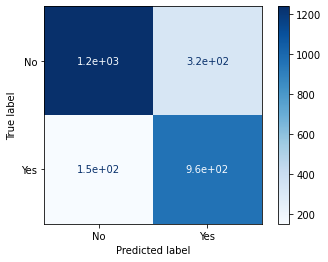

<Figure size 864x720 with 0 Axes>

In [57]:
class_names = data['Churn'].unique()

disp = plot_confusion_matrix(rf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)

plt.figure(figsize=(12,10))
plt.show()

In [0]:
predictions = rf.predict(X_test)

In [60]:
from sklearn import metrics
print("Classification report for classifier %s:\n%s\n"
      % (rf, metrics.classification_report(y_test, predictions)))

Classification report for classifier RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False):
              precision    recall  f1-score   support

           0       0.89      0.79      0.84      1560
           1       0.75      0.86      0.80      1114

    accuracy                           0.82      2674
   macro avg       0.82      0.83      0.82      2674
weighted avg       0.83      0.82      0.82      2674




# Logistic Regression sklearn

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
lr = LogisticRegression()

In [0]:
# Look at parameters used by our current logistic regression
from pprint import pprint

print('Parameters currently in use:\n')
pprint(lr.get_params())

Parameters currently in use:

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [0]:
from sklearn.model_selection import RandomizedSearchCV
# setting some logistic regression parameters

penalty = ['l1', 'l2', 'elasticnet', 'none']

C = [0.0001, 0.001, 0.01, 1.0, 10.0, 100, 1000]

fit_intercept = [True, False]

class_weight = ['balanced', None]

solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

random_grid = {'penalty': penalty,
               'C': C,
               'fit_intercept': fit_intercept,
               'class_weight': class_weight,
               'solver': solver}

In [77]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
lr_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   15.9s finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [0.0001, 0.001, 0.01, 1.0, 10.0,
                                              100, 1000],
                                        'class_weight': ['balanced', None],
                                        'fit_intercept': [True, False]

In [0]:
best_logistic = lr_random.best_estimator_

In [79]:
best_logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

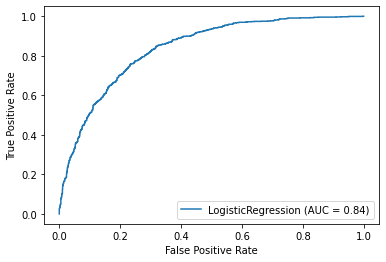

In [80]:
lr_disp = plot_roc_curve(best_logistic, X_test, y_test)
plt.show()

The improvement from tuning process was too low



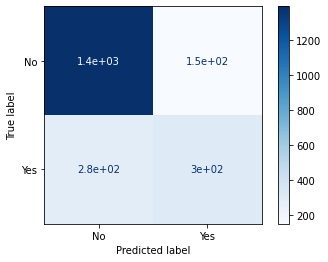

<Figure size 864x720 with 0 Axes>

In [0]:
class_names = data['Churn'].unique()

disp = plot_confusion_matrix(lr, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)

plt.figure(figsize=(12,10))
plt.show()

In [0]:
lr_predictions = lr.predict(X_test)

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (lr, metrics.classification_report(y_test, lr_predictions)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.67      0.52      0.59       574

    accuracy                           0.80      2113
   macro avg       0.75      0.71      0.73      2113
weighted avg       0.79      0.80      0.79      2113




# Neural Network sklearn

In [0]:
from sklearn.neural_network import MLPClassifier

In [0]:
clf = MLPClassifier()

In [0]:
# Look at parameters used by our current mlpclassifier
from pprint import pprint

print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}


In [0]:
# Tuning the parameters using random search

# Number of trees in random forest
hidden_layer_sizes = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# Number of features to consider at every split
activation = ['identity', 'logistic', 'tanh', 'relu']

alpha = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
# Maximum number of levels in tree
batch_size = [int(x) for x in np.linspace(200, 2000, num = 10)]

# Minimum number of samples required to split a node
learning_rate = ['constant', 'invscaling', 'adaptive']

random_grid = {'hidden_layer_sizes': hidden_layer_sizes,
               'activation': activation,
               'alpha': alpha,
               'batch_size': batch_size,
               'learning_rate': learning_rate}



In [0]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 12.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(100,),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random...
                   param_distributions={'activation': ['identity', 'logistic',
                                                       'tanh', 'relu'],
                            

In [0]:
best_random = clf_random.best_estimator_

In [0]:
best_random.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size=600, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=900, learning_rate='invscaling',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [69]:
clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

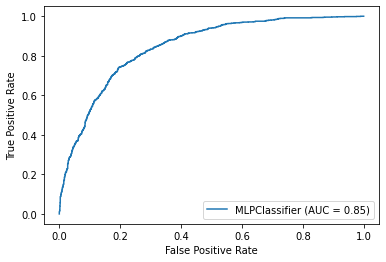

In [73]:
clf_disp = plot_roc_curve(clf, X_test, y_test)
plt.show()

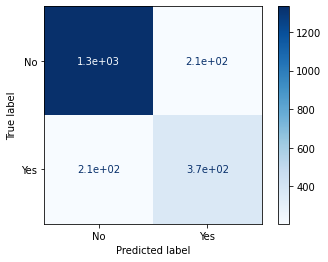

<Figure size 864x720 with 0 Axes>

In [0]:
class_names = data['Churn'].unique()

disp = plot_confusion_matrix(clf, X_test, y_test,
                             display_labels=class_names,
                             cmap=plt.cm.Blues)

plt.figure(figsize=(12,10))
plt.show()

In [0]:
clf_predictions = clf.predict(X_test)

In [0]:
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(y_test, clf_predictions)))

Classification report for classifier MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87      1539
           1       0.64      0.64      0.64       574

    accuracy                           0.81      2113
   macro avg       0.75      0.75      0.75      2113
weighted avg       0.81      0.81      0.81      2113




Not too better than logistic regression

# Decision Tree sklearn

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtc = DecisionTreeClassifier()

In [0]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

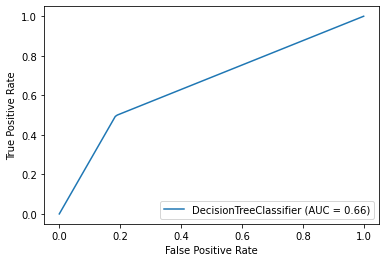

In [0]:
dtc_disp = plot_roc_curve(dtc, X_test, y_test)
plt.show()

# XGBoost Classifier

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
from xgboost import XGBClassifier
import xgboost as xgb

In [21]:
simple_xgb_model = XGBClassifier()

In [22]:
simple_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [23]:
y_pred = simple_xgb_model.predict(X_test)

In [24]:
from sklearn.metrics import plot_roc_curve

In [26]:
plot_roc_curve(simple_xgb_model, y_test, y_pred)
plt.show()

ValueError: Input numpy.ndarray must be 2 dimensional

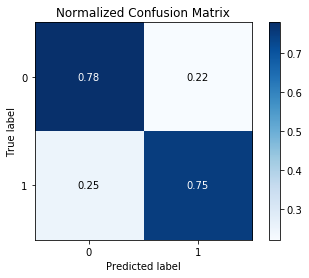

In [41]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

plt.show()

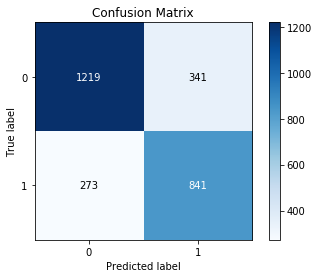

In [54]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

plt.show()

IndexError: too many indices for array

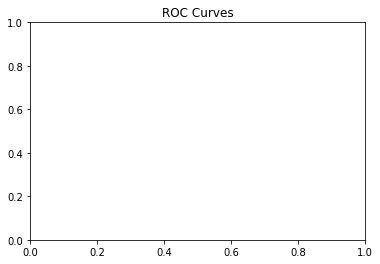

In [51]:
skplt.metrics.plot_roc(y_test[0], y_pred[0])
plt.show()

In [49]:
len(y_test)

2674

In [50]:
len(y_pred)

2674

In [52]:
type(y_test)

numpy.ndarray

In [53]:
type(y_pred)

numpy.ndarray

In [28]:
from sklearn.metrics import roc_curve, auc

In [29]:
from sklearn.metrics import roc_auc_score

In [30]:
roc_auc_score(y_test, y_pred)

0.7681737098927404

In [31]:
score = simple_xgb_model.predict_proba(X_test)

In [32]:
type(score)

numpy.ndarray

In [33]:
len(score)

2674

In [35]:
print(score[0:10])

[[0.9761188  0.02388119]
 [0.35966682 0.6403332 ]
 [0.20053035 0.79946965]
 [0.3468967  0.6531033 ]
 [0.28197455 0.71802545]
 [0.09777069 0.9022293 ]
 [0.8280692  0.17193076]
 [0.98822016 0.01177986]
 [0.80004275 0.19995727]
 [0.33258706 0.66741294]]


In [36]:
print(y_pred[0:10])

[0 1 1 1 1 1 0 0 0 1]
